In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [2]:
## Helper routines

In [3]:
# Sampling points on a circle
def sample_circle(n=1, center=np.zeros(2), radius=1):
    """
    Returns an nx2 array
    """
    angles = np.random.rand(n)*2*np.pi
    pts = np.empty([2,n])
    
    for i in range(n):
        a = angles[i]
        r = np.array([np.cos(a), np.sin(a), -np.sin(a), np.cos(a)]).reshape(2,2)
        pts[:,i] = center + np.dot(r, np.array([radius,0]).reshape(2,1)).reshape(2)
    
    return pts.T

(-2.0, 2.0)

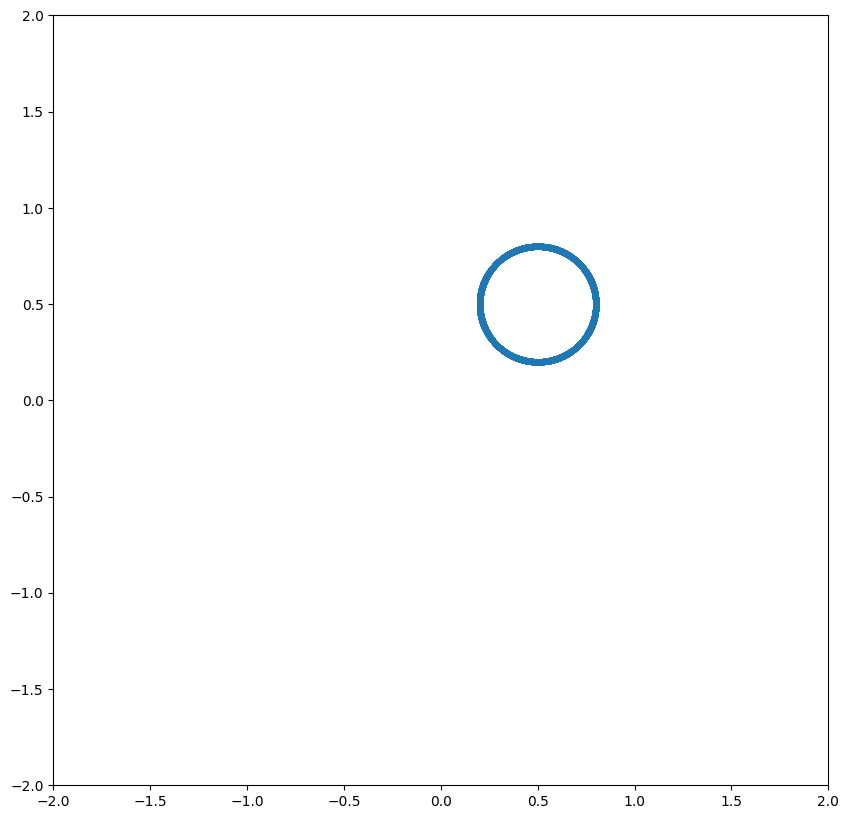

In [4]:
x = sample_circle(10000, center=np.array([.5,.5]), radius=.3)
plt.figure(figsize=(10,10))
plt.plot(x[:,0], x[:,1], '.')
plt.xlim(-2,2)
plt.ylim(-2,2)

In [5]:
# Line drawing
def draw_line(pt1, pt2, ax, **kwargs):
    """
    Draws a line passing through two points.
    """
    xmin, xmax = ax.get_xbound()
    ymin, ymax = ax.get_ybound()
    
    scale = np.sqrt((xmax - xmin)**2 + (ymax - ymin)**2)
    
    d = pt2 - pt1
    if np.isclose(np.linalg.norm(d), 0):
        print(f'draw_line warning:  pt1={pt1}, pt2={pt2}')
    
    s = pt1 - d * scale
    e = pt2 + d * scale
        
    l = mlines.Line2D([s[0], e[0]], [s[1], e[1]], **kwargs)
    ax.add_line(l)

In [6]:
def draw_line_mc(theta, ax, **kwargs):
    """
    Draws a line with slope m and y-intercept c
    """
    m = theta[0]
    c = theta[1]
    
    xmin, xmax = ax.get_xbound()
    
    ymin = m * xmin + c
    ymax = m * xmax + c
        
    l = mlines.Line2D([xmin, xmax], [ymin,ymax], **kwargs)
    ax.add_line(l)

In [7]:
def draw_line_polar(coord, ax, **kwargs):
    """
    Draws a line expressed in polar coordinates.  Here coord[0] is theta and coord[1] is rho.  Theta is in radians.
    """
    theta = coord[0]
    rho = coord[1]
    
    pt = np.array([
        rho * np.cos(theta),
        rho * np.sin(theta)
    ])
    
    n = pt / np.linalg.norm(pt)
    c = np.dot(n, pt)
    
    x2 = pt[0]+1
    y2 = (c - n[0]*x2) / n[1]
    
    return draw_line(pt, np.array([x2, y2]), ax, **kwargs)

draw_line warning:  pt1=[1 2], pt2=[1 2]


(-2.0, 2.0)

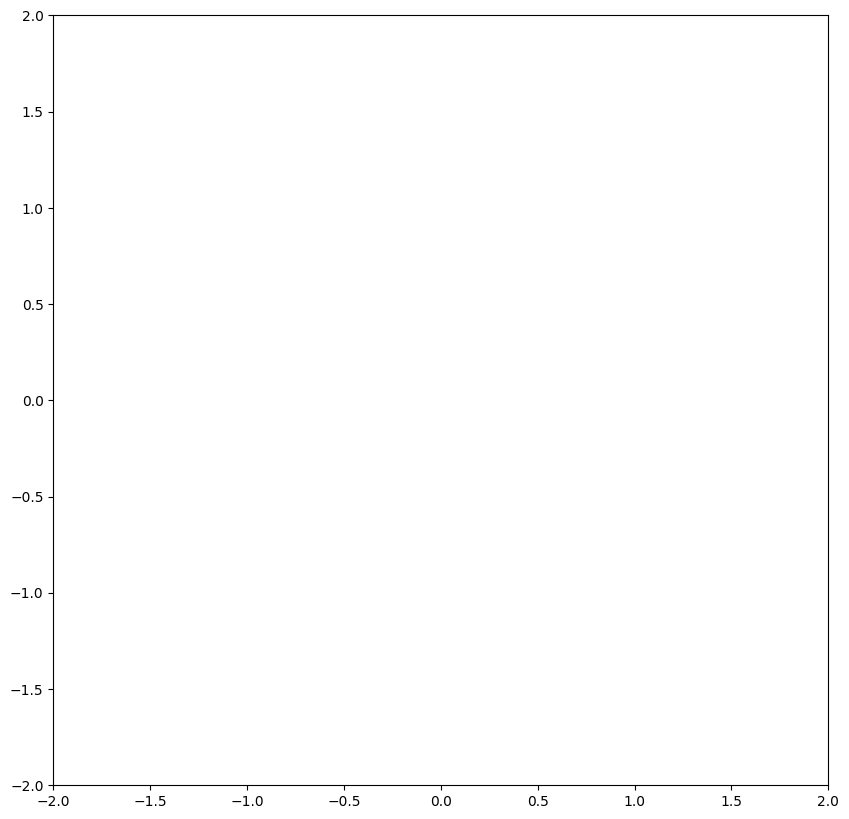

In [8]:
plt.figure(figsize=(10,10))
draw_line(np.array([1,2]), np.array([1,2]), plt.gca())
plt.xlim(-2,2)
plt.ylim(-2,2)

In [9]:
def compute_m_and_c(pt1, pt2):
    A = np.array([pt1[0], 1, pt2[0], 1]).reshape(2,2)
    y = np.array([pt1[0], pt2[1]]).reshape(2,1)
    return np.dot(np.linalg.inv(A), y)

In [10]:
## Hough transform

In [11]:
def toy_data1():
    true_l1 = [1, 3]
    x1 = np.linspace(1,5,5)
    y1 = true_l1[0] * x1 + true_l1[1]

    true_l2 = [2, -5]
    x2 = np.linspace(5,7,3)
    y2 = true_l2[0] * x2 + true_l2[1]

    data = np.hstack([x1, x2, y1, y2]).reshape(2,-1).T
    return data, (0, 12, 0, 12)

In [12]:
data, extents = toy_data1()

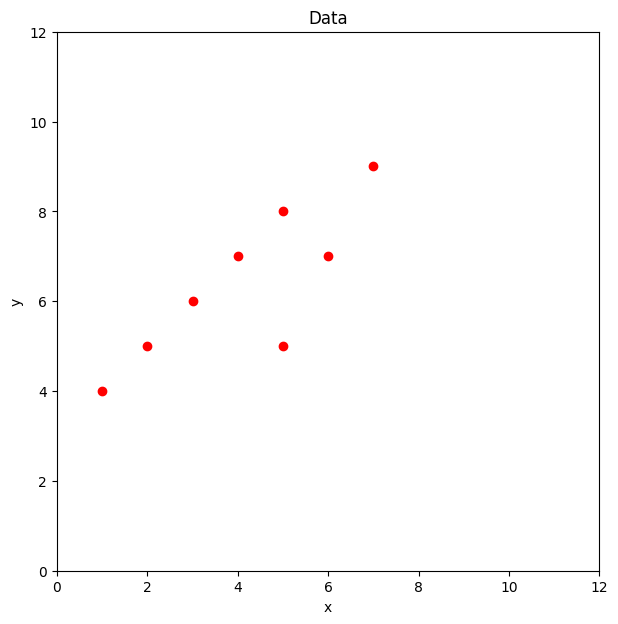

In [13]:
plt.figure(figsize=(7,7))
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[:,0], data[:,1], c='red')
plt.xlim(extents[:2])
plt.ylim(extents[-2:]);

In [14]:
id = 3

pt = data[id,:]

In [15]:
np.random.seed(0)
num_lines = 10
tmp = sample_circle(n=num_lines, center=pt, radius=1)

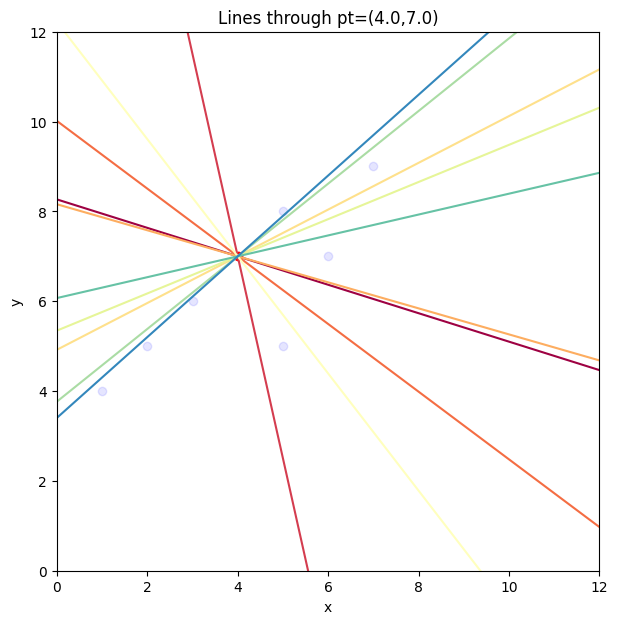

In [16]:
cmap = cm.get_cmap('Spectral')

mc = np.empty((num_lines, 2))
plt.figure(figsize=(7,7))
plt.title(f'Lines through pt=({pt[0]},{pt[1]})')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.1)
plt.xlim(extents[:2])
plt.ylim(extents[-2:])
for i in range(num_lines):
    draw_line(pt, tmp[i,:], plt.gca(), color=cmap(i/num_lines))
    mc[i,:] = compute_m_and_c(pt, tmp[i,:]).reshape(2)
plt.scatter(data[id,0], data[id,1], c='red');

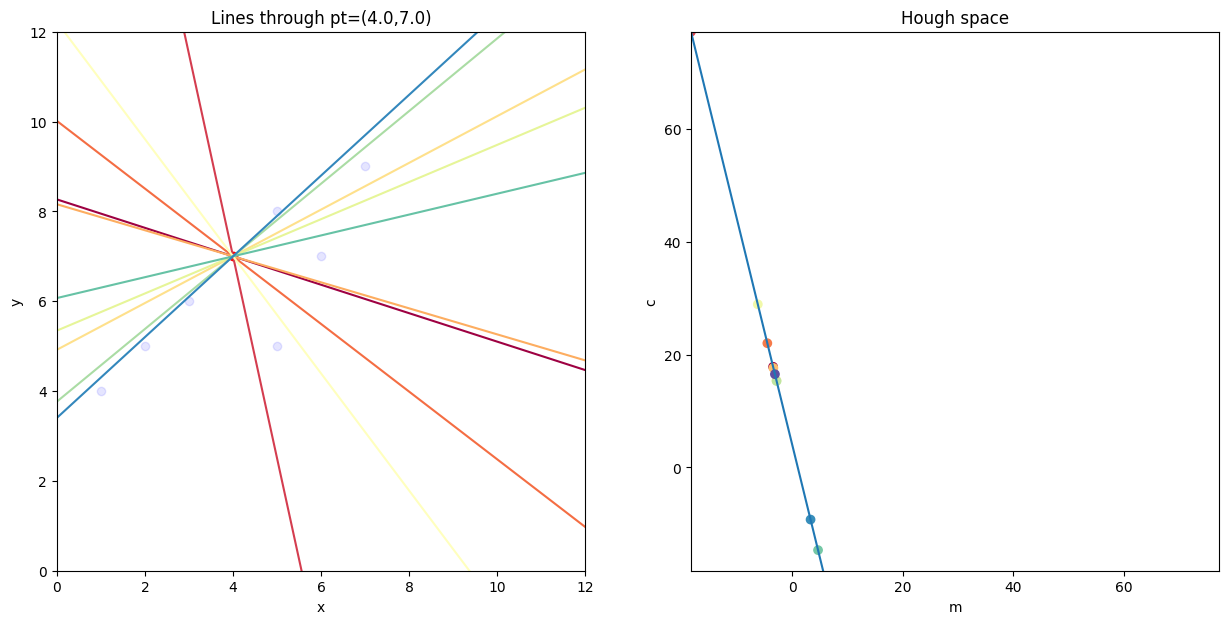

In [17]:
smallest = np.min(mc.flatten())
largest = np.max(mc.flatten())

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.1)
plt.xlim(extents[:2])
plt.ylim(extents[-2:])
for i in range(num_lines):
    draw_line(pt, tmp[i,:], plt.gca(), color=cmap(i/num_lines))
plt.scatter(data[id,0], data[id,1], c='red')
plt.title(f'Lines through pt=({pt[0]},{pt[1]})')
plt.subplot(122)
plt.xlim(smallest, largest)
plt.ylim(smallest, largest)
draw_line(mc[0,:], mc[1,:], plt.gca())
plt.scatter(mc[:,0], mc[:,1], c=range(num_lines), cmap=cmap)
plt.xlabel('m')
plt.ylabel('c')
plt.title('Hough space');

In [18]:
## Relationship between Cartesian space and Hough space

In [19]:
n = data.shape[0]
mc = np.empty((n,2))
for i in range(n):
    mc[i,0] = - data[i,0]
    mc[i,1] = data[i, 1]

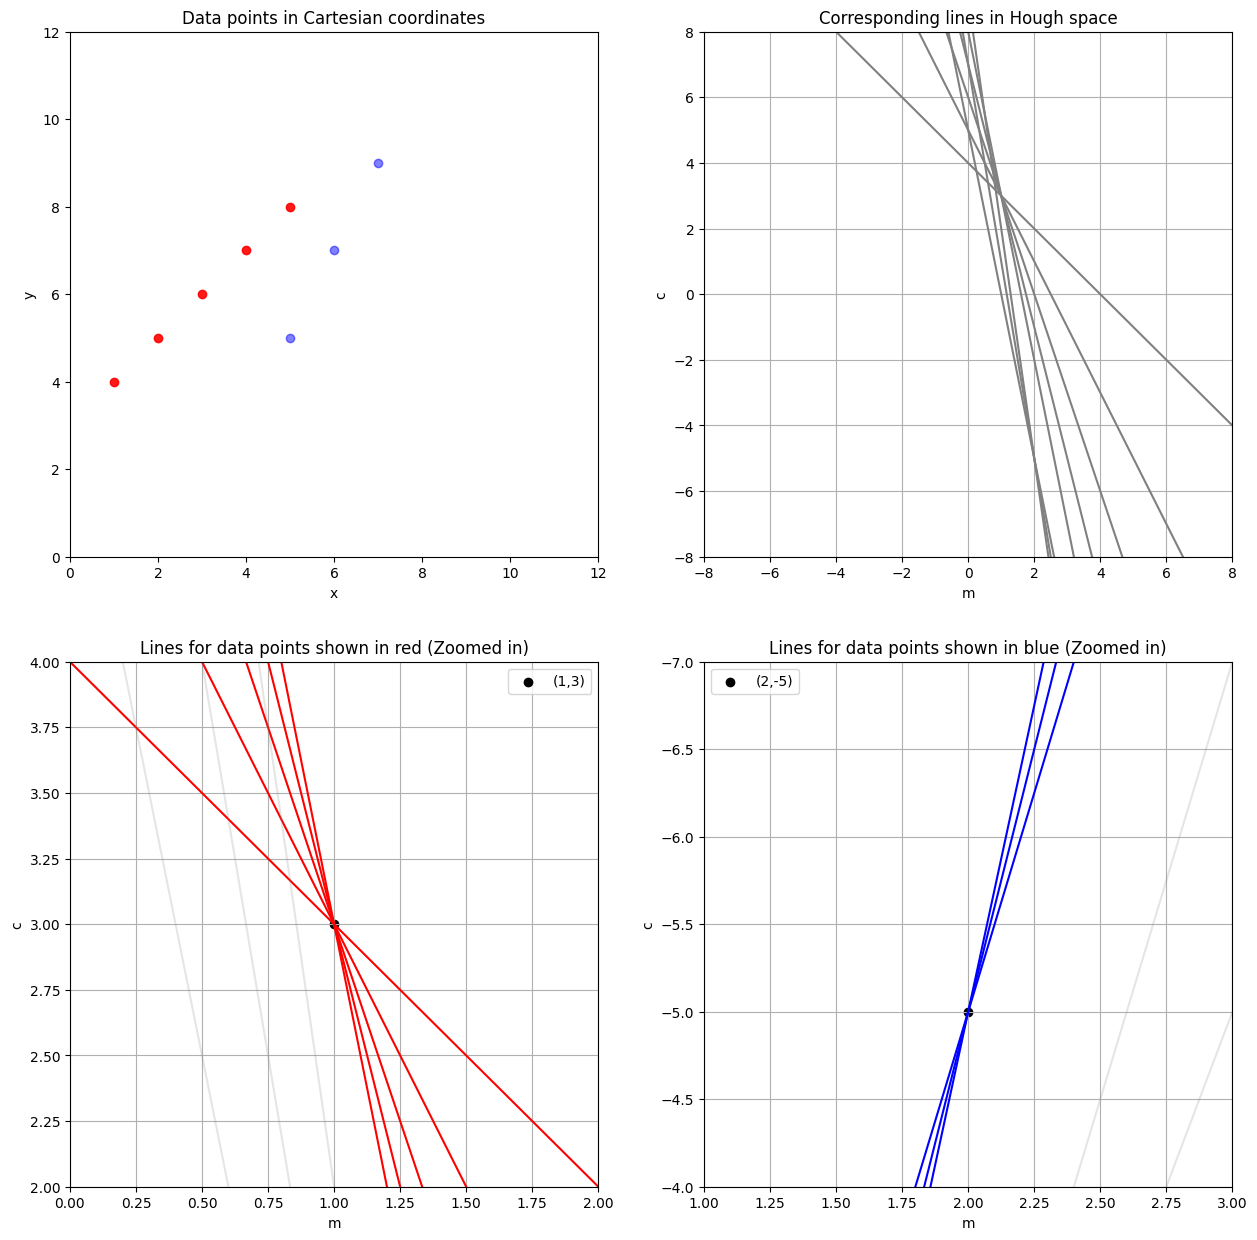

In [20]:
smallest = np.min(mc.flatten())
largest = np.max(mc.flatten())

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points in Cartesian coordinates')
plt.scatter(data[-3:,0], data[-3:,1], c='blue', alpha=0.5)
plt.scatter(data[:5,0], data[:5,1], c='red', alpha=0.9)
plt.xlim([0,12])
plt.ylim([0,12])
plt.subplot(222)
plt.title('Corresponding lines in Hough space')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.grid(which='both')
for i in range(n-3):
    draw_line_mc(mc[i,:], plt.gca(), c='gray')
for i in range(5,8):
    draw_line_mc(mc[i,:], plt.gca(), c='gray')
plt.xlabel('m')
plt.ylabel('c');
plt.subplot(223)
plt.title('Lines for data points shown in red (Zoomed in)')
plt.grid(which='both')
plt.xlim(0, 2)
plt.ylim(2, 4)
plt.xlabel('m')
plt.ylabel('c');
for i in range(n-3):
    draw_line_mc(mc[i,:], plt.gca(), c='red')
for i in range(n-3,n):
    draw_line_mc(mc[i,:], plt.gca(), c='gray', alpha=0.2)
plt.scatter([1], [3], label='(1,3)', c='black', alpha=1)
plt.legend()    
plt.subplot(224)
plt.title('Lines for data points shown in blue (Zoomed in)')
plt.grid(which='both')
plt.xlim(1, 3)
plt.ylim(-4, -7)
plt.xlabel('m')
plt.ylabel('c');
for i in range(n-3):
    draw_line_mc(mc[i,:], plt.gca(), c='gray', alpha=0.2)
for i in range(n-3,n):
    draw_line_mc(mc[i,:], plt.gca(), c='blue')
plt.scatter([2], [-5], label='(2,-5)', c='black')
plt.legend();

In [21]:
## Counting votes in Hough space

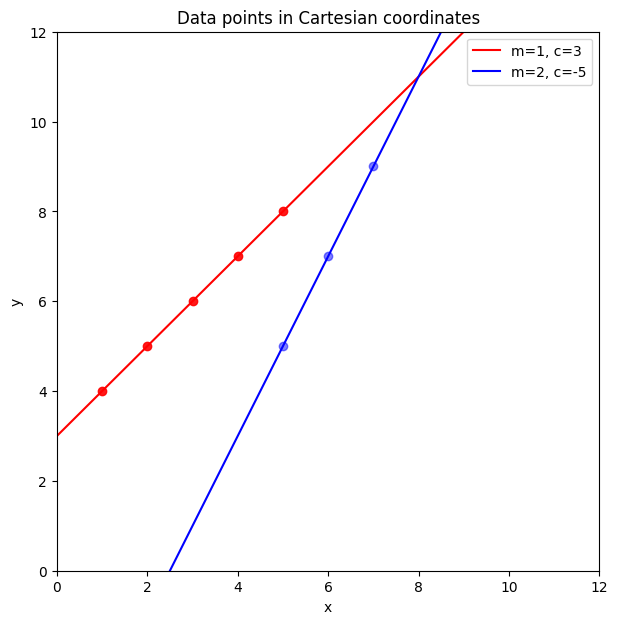

In [22]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data points in Cartesian coordinates')
ax.scatter(data[-3:,0], data[-3:,1], c='blue', alpha=0.5)
ax.scatter(data[:5,0], data[:5,1], c='red', alpha=0.9)
ax.set_xlim(extents[:2])
ax.set_ylim(extents[-2:])
# Draw first line
draw_line_mc([1,3], ax, label='m=1, c=3', c='red')
# Draw second line
draw_line_mc([2, -5], ax, label='m=2, c=-5', c='blue')
ax.legend();

In [23]:
## Hough transform in Practice

In [24]:
def toy_data2():
    np.random.seed(0)

    true_l1 = [0, 3]
    x1 = np.linspace(-5,5,40)
    y1 = true_l1[0] * x1 + true_l1[1] + np.random.randn(40)*.2

    true_l2 = [0, -10]
    x2 = np.linspace(-10,10,50)
    y2 = true_l2[0] * x2 + true_l2[1] + np.random.randn(50)*.3

    true_l3 = [2, -14]
    x3 = np.linspace(-0,10,60)
    y3 = true_l3[0] * x3 + true_l3[1] + np.random.randn(60)*.4

    data = np.hstack([x1, x2, x3, y1, y2, y3]).reshape(2,-1).T
    return data, (-15, 15, -15, 15)

In [25]:
data, extents = toy_data2()

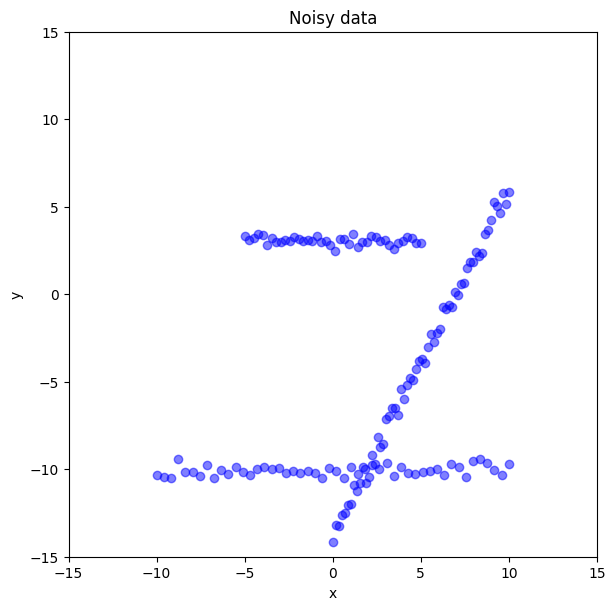

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy data')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.5)
plt.xlim(extents[:2])
plt.ylim(extents[-2:]);

In [27]:
# Transforming Cartesian points into Hough space

In [28]:
n = data.shape[0]
mc = np.empty((n,2))
for i in range(n):
    mc[i,0] = - data[i,0]
    mc[i,1] = data[i, 1]

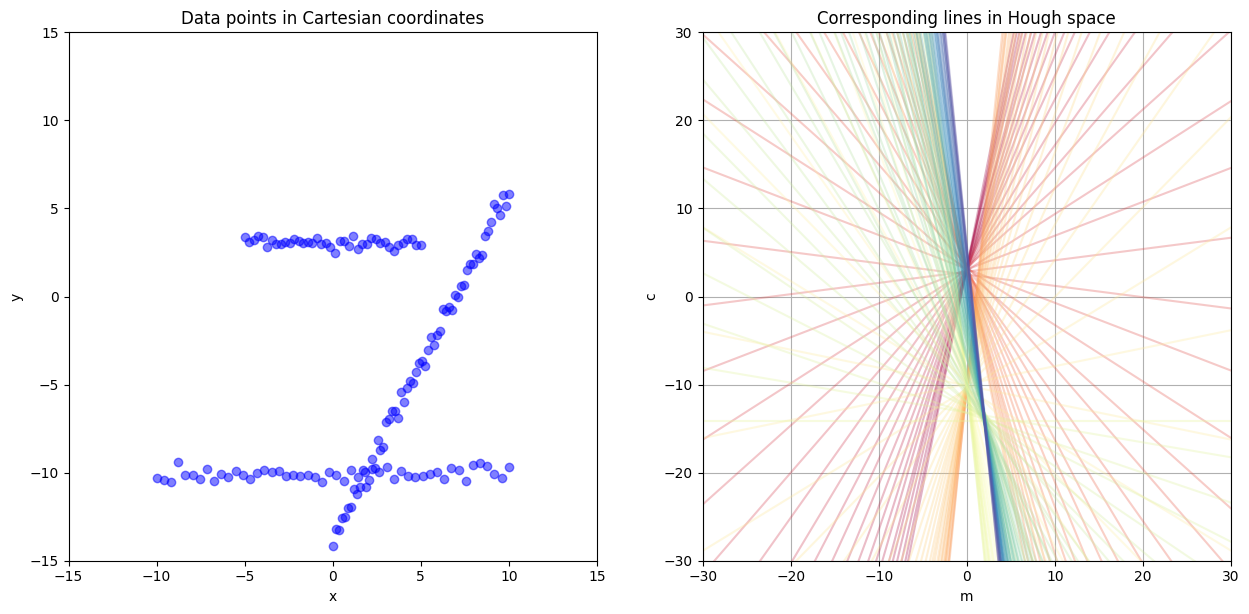

In [29]:
cmap = cm.get_cmap('Spectral')

plt.figure(figsize=(15,7))
plt.subplot(121, aspect=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points in Cartesian coordinates')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.5)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.subplot(122, aspect=True)
plt.title('Corresponding lines in Hough space')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.grid(which='both')
for i in range(n):
    draw_line_mc(mc[i, :], plt.gca(), c=cmap(i/n), alpha=0.3)
plt.xlabel('m')
plt.ylabel('c');

In [30]:
## Rastering c-m lines in Hough space

In [31]:
# Step 1: set up the c-m grid
def define_grid(i, j):
    i_values = np.linspace(i[0], i[1], i[2])
    j_values = np.linspace(j[0], j[1], j[2])
    ii, jj = np.meshgrid(i_values, j_values, indexing='ij')
    ii = ii.flatten()
    jj = jj.flatten()
    di = np.abs(i_values[1] - i_values[0])
    dj = np.abs(j_values[1] - j_values[0])
    
    return {
        'extents': np.vstack([i,j]),
        'i': i_values,
        'j': j_values,
        'ii': ii,
        'jj': jj
    }

In [32]:
m_min, m_max, m_num = -30, 30, 1024
c_min, c_max, c_num = -30, 30, 1024

m = np.linspace(m_min, m_max, m_num)
c = np.linspace(c_min, c_max, c_num)
print(f'Shape of m = {m.shape}')
print(f'Shape of c = {c.shape}')

mm, cc = np.meshgrid(m, c, indexing='ij')
print(f'Shape of mm = {mm.shape}')
print(f'Shape of cc = {cc.shape}')
mm = mm.flatten()
cc = cc.flatten()

Shape of m = (1024,)
Shape of c = (1024,)
Shape of mm = (1024, 1024)
Shape of cc = (1024, 1024)


In [33]:
dc = c[1] - c[0]
print(f'dc = {dc}')

dm = m[1] - m[0]
print(f'dm = {dm}')

dc = 0.058651026392961825
dm = 0.058651026392961825


In [34]:
# Step 2: rasterize lines in the c-m grid.

In [35]:
counts = np.zeros((m_num, c_num))

In [36]:
mcgrid = np.vstack([mm, cc])
print(f'Shape of mc = {mc.shape}')

Shape of mc = (150, 2)


In [37]:
for i in range(n):
    x = data[i,0]
    y = data[i,1]
    if x > 1 or x < -1:
        estimated_m = (y - mcgrid[1,:]) / x
        diffs = np.abs(estimated_m - mcgrid[0,:])
        line = diffs < .5*dm
    else:
        estimated_c =  y - x * mcgrid[0,:]
        diffs = np.abs(estimated_c - mcgrid[1,:])
        line = diffs < .5*dc
    line = line.astype('int').reshape(m_num, c_num)
    counts = counts + line

In [38]:
def raster_hough_line(data, counts, mm, cc, dm, dc):
    m_num, c_num = counts.shape
    n = data.shape[0]
    
    for i in range(n):
        x = data[i,0]
        y = data[i,1]
        if x > 1 or x < -1:
            estimated_m = (y - cc) / x
            diffs = np.abs(estimated_m - mm)
            votes = diffs < .5*dm
        else:
            estimated_c =  y - x * mm
            diffs = np.abs(estimated_c - cc)
            votes = diffs < .5*dc
        votes = votes.astype('int').reshape(m_num, c_num)
        counts = counts + votes    
    return counts

In [39]:
counts = np.zeros((m_num, c_num))
counts = raster_hough_line(data, counts, mm, cc, dm, dc)

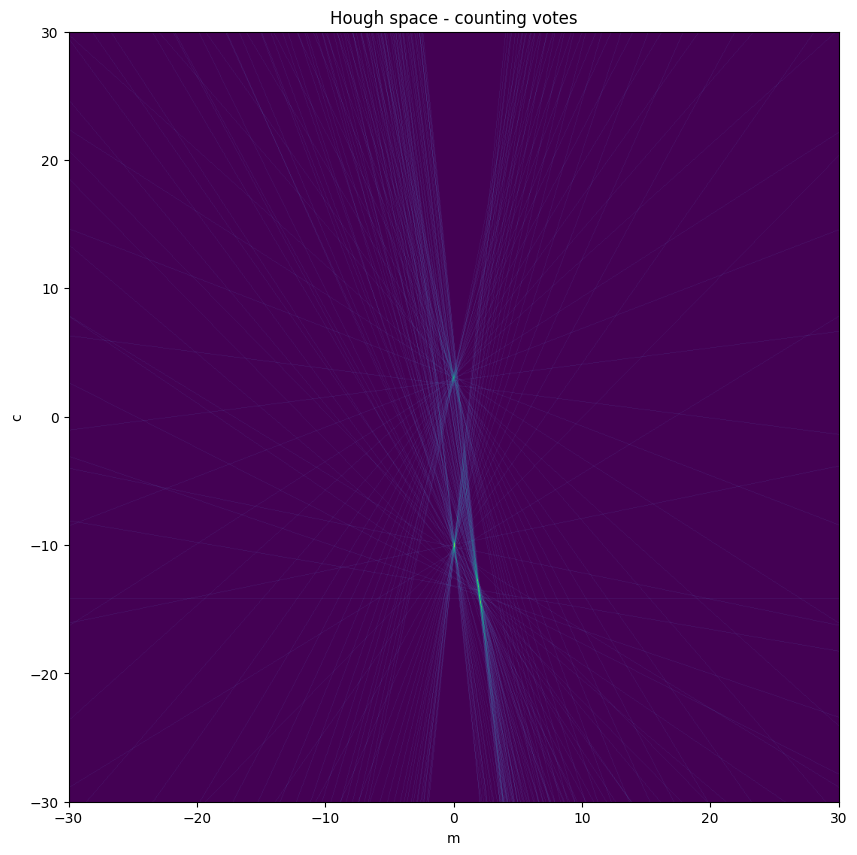

In [40]:
plt.figure(figsize=(10,10))
plt.title('Hough space - counting votes')
plt.imshow(counts.T, origin='lower', extent=[m_min, m_max, c_min, c_max])
plt.xlabel('m')
plt.ylabel('c');

In [41]:
# Step 3: identify  k  cells having the highest counts (votes).

In [42]:
k = 100

counts_ = counts.ravel()
cell_loc_ = counts_.argsort()[::-1][:k]
cell_loc_i, cell_loc_j = np.unravel_index(cell_loc_, counts.shape)

estimated_m = m[cell_loc_i]
estimated_c = c[cell_loc_j]

In [43]:
def find_top_k_cells(k, counts, ii, jj):
    """
    ii is m or theta 
    jj is c or rho
    """
    counts_ = counts.ravel()
    cell_loc_ = counts_.argsort()[::-1][:k]
    cell_loc_i, cell_loc_j = np.unravel_index(cell_loc_, counts.shape)

    return ii[cell_loc_i], jj[cell_loc_j]

In [44]:
k = 100
estimated_m, estimated_c = find_top_k_cells(k, counts, m, c)

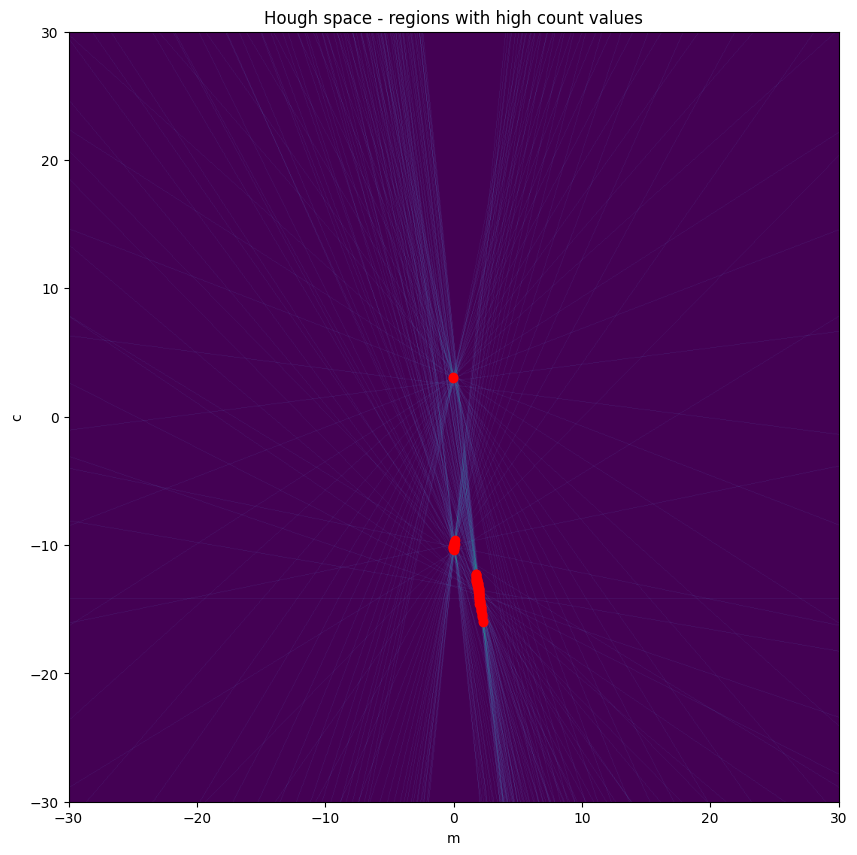

In [45]:
plt.figure(figsize=(10,10))
plt.title('Hough space - regions with high count values')
for i in range(k):
    plt.scatter(estimated_m[i], estimated_c[i], c='r')
plt.imshow(counts.T, origin='lower', extent=[m_min, m_max, c_min, c_max])
plt.xlabel('m')
plt.ylabel('c');

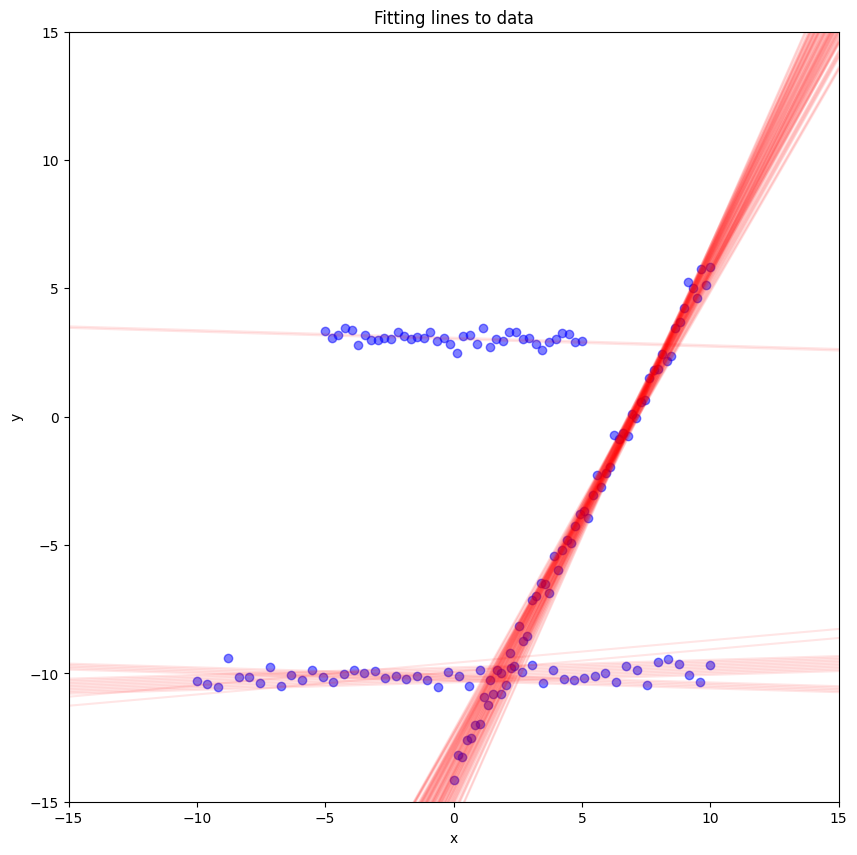

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(111, aspect=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting lines to data')
plt.xlim(extents[:2])
plt.ylim(extents[-2:])
for i in range(k):
    theta = np.array([estimated_m[i], estimated_c[i]])
    draw_line_mc(theta, plt.gca(), alpha=0.1, c='red')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.5);

In [47]:
# Step 4: find the "best" lines

In [48]:
best_lines = KMeans(n_clusters=3, random_state=0).fit(np.vstack([estimated_m, estimated_c]).T)
print(f'Best lines =\n{best_lines.cluster_centers_}')

best_lines

Best lines =
[[  0.01955034 -10.05865103]
 [  1.96920821 -13.76612903]
 [ -0.02932551   3.04985337]]


KMeans(n_clusters=3, random_state=0)

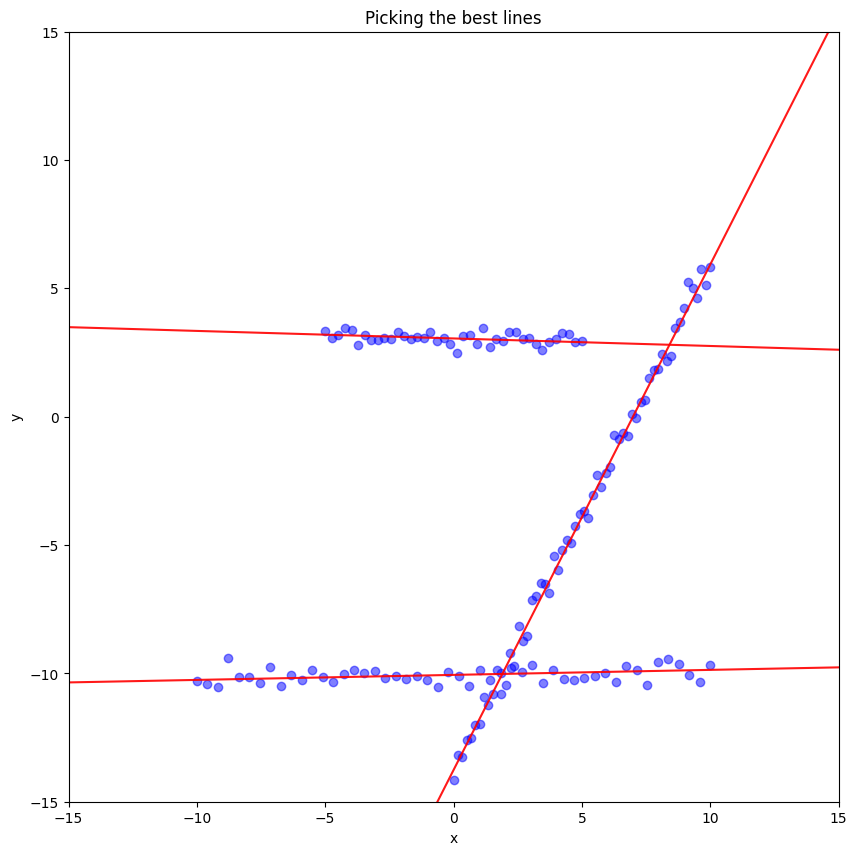

In [49]:
plt.figure(figsize=(10,10))
plt.subplot(111, aspect=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Picking the best lines')
plt.xlim(extents[:2])
plt.ylim(extents[-2:])
for i in range(3):
    theta = best_lines.cluster_centers_[i,:]
    draw_line_mc(theta, plt.gca(), alpha=0.9, c='red')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.5);

In [50]:
## Collecting votes

In [51]:
# Setting up a grid

In [52]:
nbins_m = 32
nbins_c = 32

edges_m = np.linspace(m_min, m_max, nbins_m)
edges_c = np.linspace(c_min, c_max, nbins_c)

width_edges_m = edges_m[1] - edges_m[0]
width_edges_c = edges_c[1] - edges_c[0]

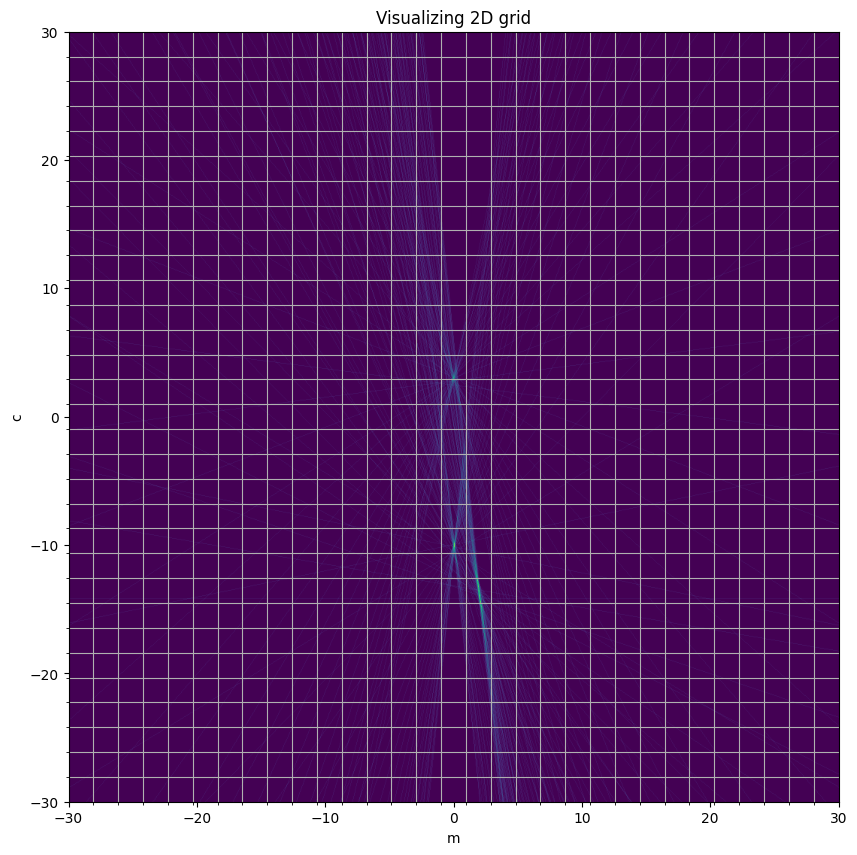

In [53]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111, title='Visualizing 2D grid')
ax.set_xlim(-30, 30)
ax.set_xticks(edges_m, minor=True)
ax.xaxis.grid(True, which='minor')
ax.set_ylim(-30, 30)
ax.set_yticks(edges_c, minor=True)
ax.yaxis.grid(True, which='minor')
plt.imshow(counts.T, origin='lower', extent=[m_min, m_max, c_min, c_max])
plt.xlabel('m')
plt.ylabel('c');

In [54]:
H, _, _ = np.histogram2d(mm, cc, weights=counts.ravel(), bins=(edges_m, edges_c))

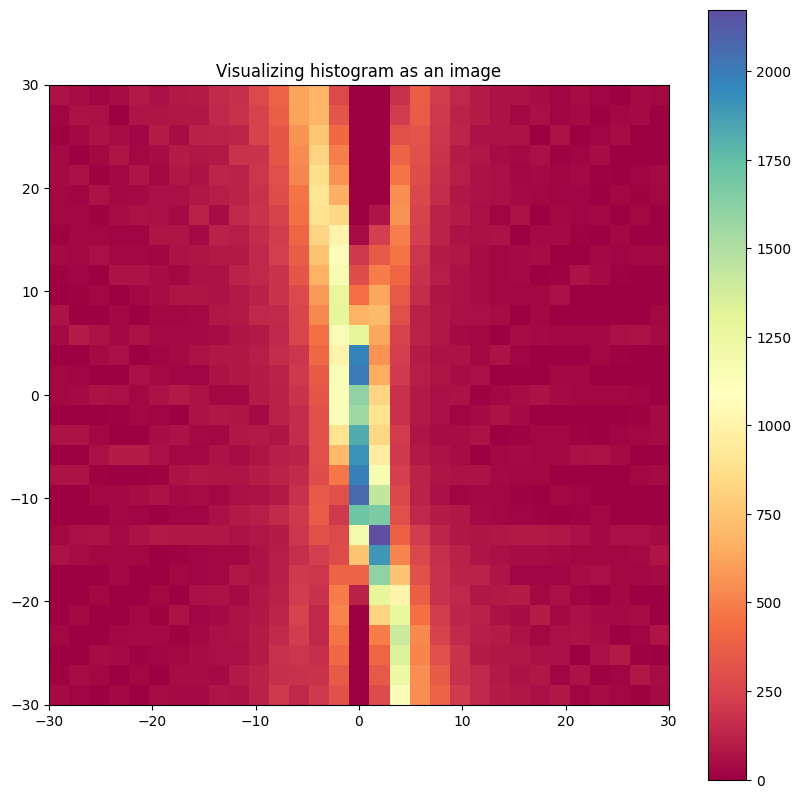

In [55]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, title='Visualizing histogram as an image')
plt.imshow(H.T, interpolation='nearest', origin='lower', extent=[edges_m[0], edges_m[-1], edges_c[0], edges_c[-1]], cmap='Spectral')
plt.colorbar();

In [56]:
# Finding bins with the largest counts

In [57]:
k = 5

H_ = H.ravel()
cell_loc_ = H_.argsort()[::-1][:k]
cell_loc_i, cell_loc_j = np.unravel_index(cell_loc_, H.shape)

estimated_m = edges_m[cell_loc_i] + (width_edges_m*0.5)
estimated_c = edges_c[cell_loc_j] + (width_edges_c*0.5)

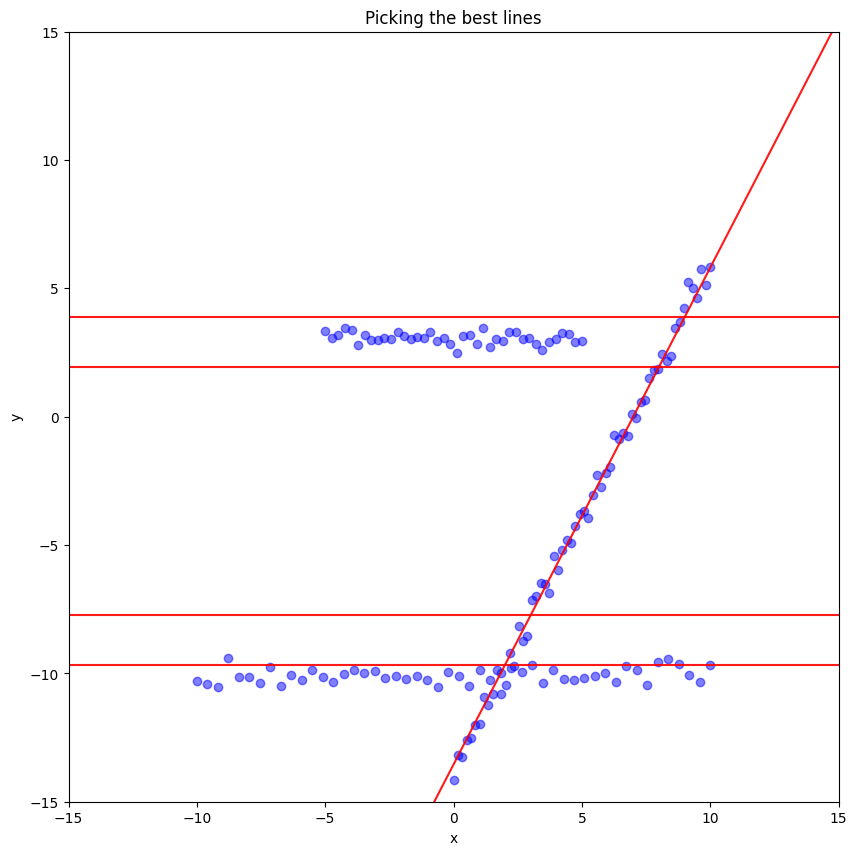

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(111, aspect=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Picking the best lines')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
for i in range(k):
    theta = np.array([estimated_m[i], estimated_c[i]])
    draw_line_mc(theta, plt.gca(), alpha=0.9, c='red')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.5);

In [59]:
## Polar representation for detecting lines using Hough Transform

In [60]:
data, extents = toy_data1()

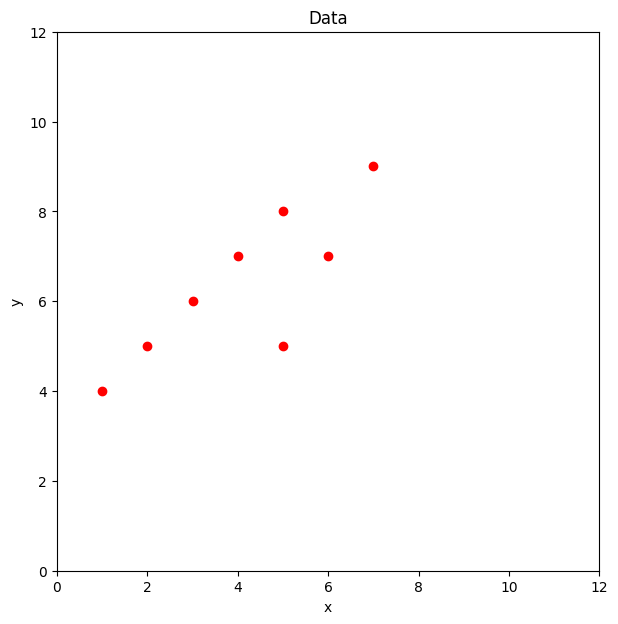

In [61]:
plt.figure(figsize=(7,7))
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[:,0], data[:,1], c='red')
plt.xlim(extents[:2])
plt.ylim(extents[-2:]);

In [62]:
# Setting up θ and ρ parameter space

In [63]:
theta_min, theta_max, theta_num = 0, 2*np.pi, 1000
rho_min, rho_max, rho_num = 0.0, np.sqrt(12*12 + 12*12), 1000

print(f'theta = ({theta_min},{theta_max})')
print(f'rho = ({rho_min},{rho_max})')

theta = np.linspace(theta_min, theta_max, theta_num)
rho = np.linspace(rho_min, rho_max, rho_num)

tt, rr = np.meshgrid(theta, rho, indexing='ij')
tt = tt.flatten()
rr = rr.flatten()

theta = (0,6.283185307179586)
rho = (0.0,16.97056274847714)


In [64]:
dtheta = theta[1] - theta[0]
drho = rho[1] - rho[0]
print(f'dtheta = {dtheta}')
print(f'drho = {drho}')

dtheta = 0.006289474781961547
drho = 0.016987550298775914


In [65]:
def raster_hough_polar(data, counts, rr, tt, drho):
    theta_num, rho_num = counts.shape
    n = data.shape[0]
    for i in range(n):
        x = data[i,0]
        y = data[i,1]

        estimated_rho = x * np.cos(tt) + y * np.sin(tt)
        diffs = np.abs(estimated_rho - rr)
        votes = diffs <= drho     
        votes = votes.astype('int').reshape(theta_num, rho_num)
        counts = counts + votes
    return counts

In [66]:
# Collecting votes in Hough space

In [67]:
counts = np.zeros((theta_num, rho_num))
counts = raster_hough_polar(data, counts, rr, tt, drho)

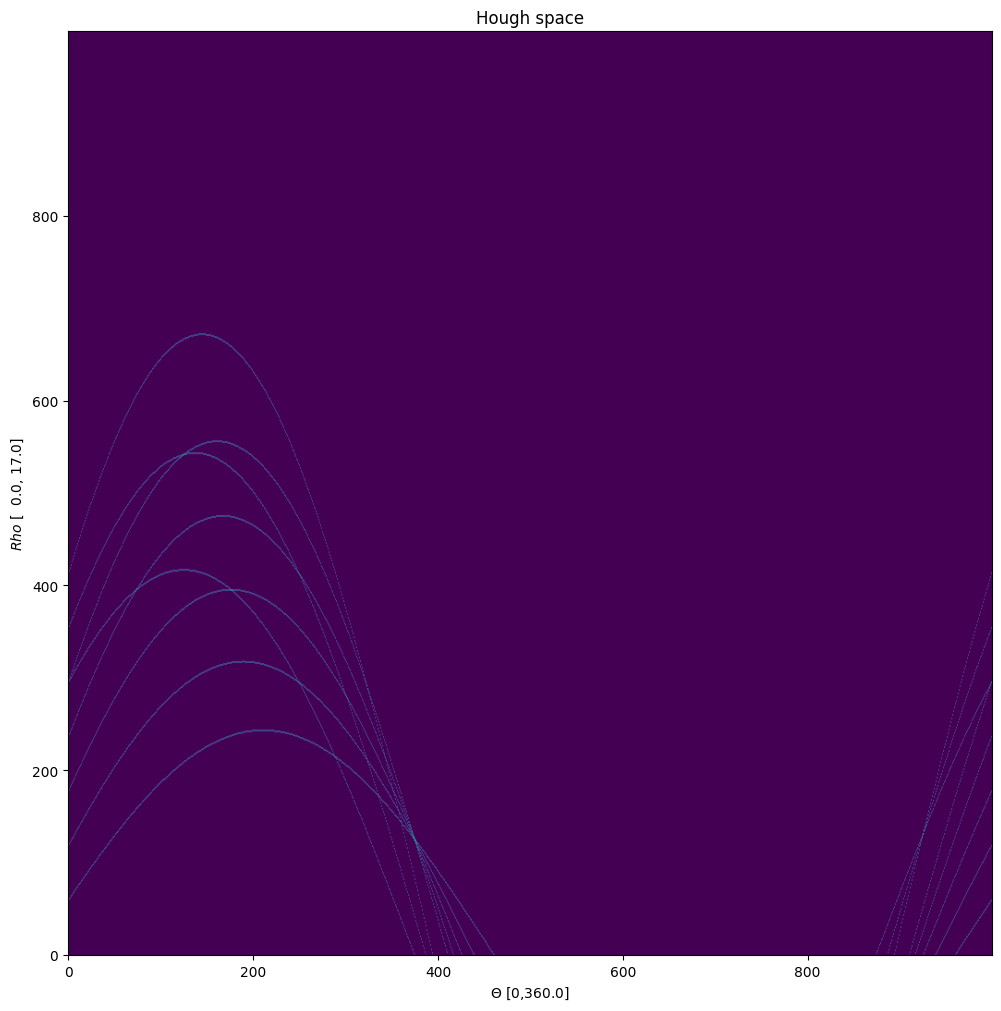

In [68]:
plt.figure(figsize=(12,12))
plt.title('Hough space')
plt.imshow(counts.T, origin='lower')
plt.imshow(counts.T, origin='lower')
plt.xlabel(f'$\Theta$ [{theta_min},{theta_max*180/np.pi}]')
plt.ylabel(f'$Rho$ [{rho_min:5.3},{rho_max:5.3}]');

In [69]:
# Estimating θ and ρ

In [70]:
k = 4
estimated_theta, estimated_rho = find_top_k_cells(k, counts, theta, rho)

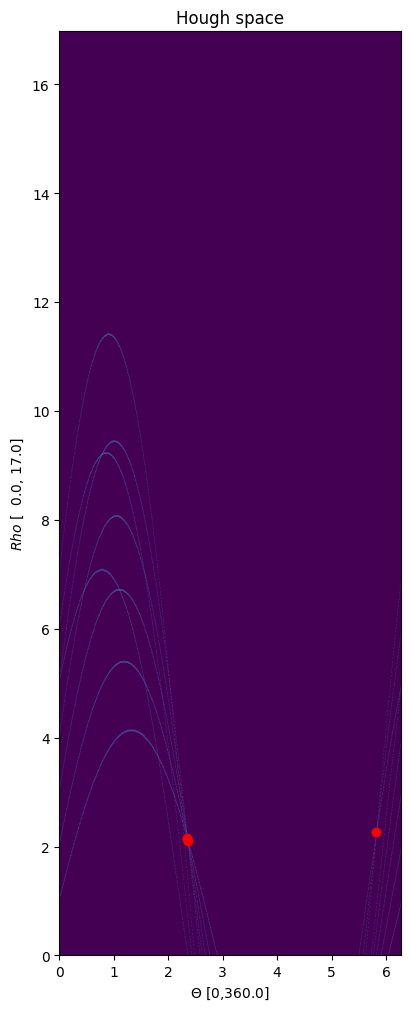

In [71]:
plt.figure(figsize=(12,12))
plt.title('Hough space')
plt.xlim(theta_min, theta_max)
plt.ylim(rho_min, rho_max)
plt.scatter(estimated_theta, estimated_rho, c='red')
plt.imshow(counts.T, origin='lower')
plt.imshow(counts.T, origin='lower', extent=[theta_min, theta_max, rho_min, rho_max])
plt.xlabel(f'$\Theta$ [{theta_min},{theta_max*180/np.pi}]')
plt.ylabel(f'$Rho$ [{rho_min:5.3},{rho_max:5.3}]');

In [72]:
print(f'estimated (theta, rho) =\n{np.vstack([estimated_theta, estimated_rho]).T}')

estimated (theta, rho) =
[[2.35855304 2.10645624]
 [2.35226357 2.15741889]
 [2.35226357 2.14043134]
 [5.82405365 2.27633174]]


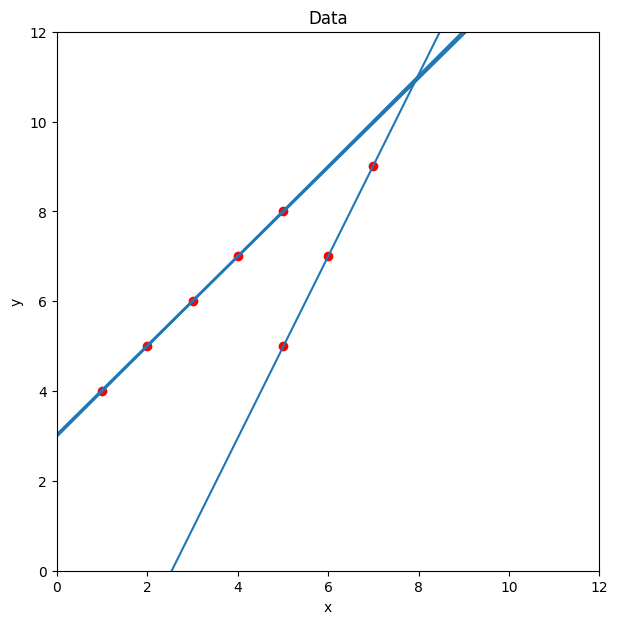

In [73]:
plt.figure(figsize=(7,7))
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[:,0], data[:,1], c='red')
plt.xlim(extents[:2])
plt.ylim(extents[-2:]);
for i in range(k):
    coord = np.array([
        estimated_theta[i],
        estimated_rho[i]
    ])
    draw_line_polar(coord, plt.gca())

In [74]:
# Noisy data

In [75]:
data, extents = toy_data2()

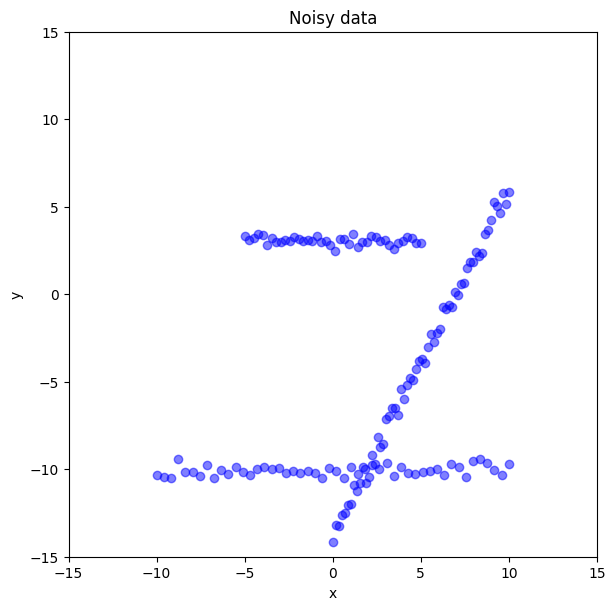

In [76]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy data')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.5)
plt.xlim(extents[:2])
plt.ylim(extents[-2:]);

In [77]:
# Collecting votes in Hough space

In [78]:
theta_min, theta_max, theta_num = 0, 2*np.pi, 1000
#rho_min, rho_max, rho_num = 0.0, np.sqrt(30*30 + 30*30), 1000
rho_min, rho_max, rho_num = 0.0, 25.0, 1000

print(f'theta = ({theta_min},{theta_max})')
print(f'rho = ({rho_min},{rho_max})')

theta = np.linspace(theta_min, theta_max, theta_num)
rho = np.linspace(rho_min, rho_max, rho_num)

tt, rr = np.meshgrid(theta, rho, indexing='ij')
tt = tt.flatten()
rr = rr.flatten()

theta = (0,6.283185307179586)
rho = (0.0,25.0)


In [79]:
dtheta = theta[1] - theta[0]
drho = rho[1] - rho[0]
print(f'dtheta = {dtheta}')
print(f'drho = {drho}')

dtheta = 0.006289474781961547
drho = 0.025025025025025027


In [80]:
counts = np.zeros((theta_num, rho_num))
counts = raster_hough_polar(data, counts, rr, tt, drho)

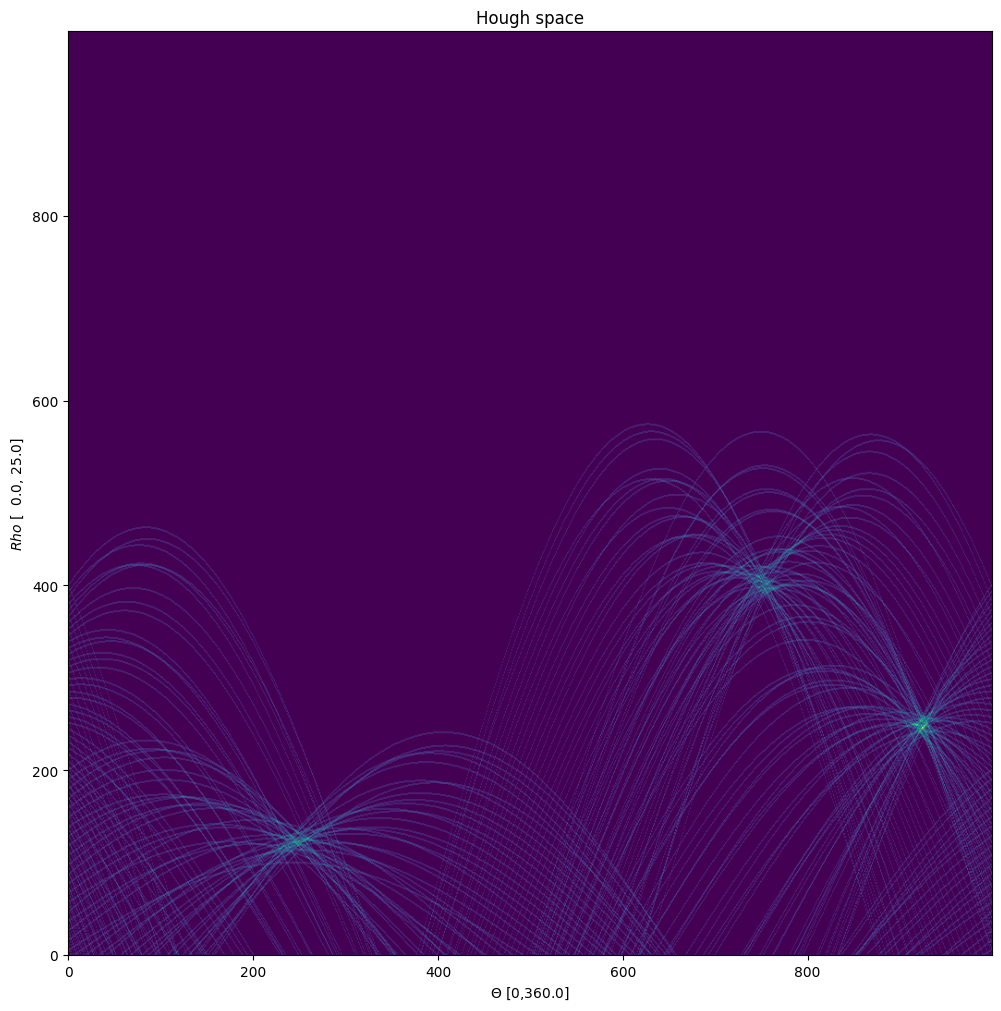

In [81]:
plt.figure(figsize=(12,12))
plt.title('Hough space')
plt.imshow(counts.T, origin='lower')
plt.imshow(counts.T, origin='lower')
plt.xlabel(f'$\Theta$ [{theta_min},{theta_max*180/np.pi}]')
plt.ylabel(f'$Rho$ [{rho_min:5.3},{rho_max:5.3}]');

In [82]:
nbins_theta = 32
nbins_rho = 32

edges_theta = np.linspace(theta_min, theta_max, nbins_theta)
edges_rho = np.linspace(rho_min, rho_max, nbins_rho)

width_edges_theta = edges_theta[1] - edges_theta[0]
width_edges_rho = edges_rho[1] - edges_rho[0]

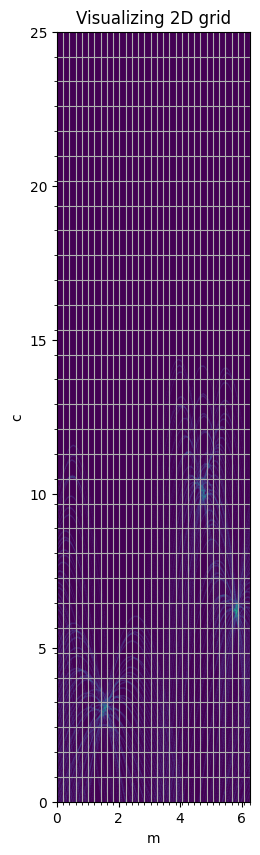

In [83]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111, title='Visualizing 2D grid')
ax.set_xlim(theta_min, theta_max)
ax.set_xticks(edges_theta, minor=True)
ax.xaxis.grid(True, which='minor')
ax.set_ylim(rho_min, rho_max)
ax.set_yticks(edges_rho, minor=True)
ax.yaxis.grid(True, which='minor')
plt.imshow(counts.T, origin='lower', extent=[theta_min, theta_max, rho_min, rho_max])
plt.xlabel('m')
plt.ylabel('c');

In [84]:
H, _, _ = np.histogram2d(tt, rr, weights=counts.ravel(), bins=(edges_theta, edges_rho))

In [85]:
k = 3

H_ = H.ravel()
cell_loc_ = H_.argsort()[::-1][:k]
cell_loc_i, cell_loc_j = np.unravel_index(cell_loc_, H.shape)

estimated_theta = edges_theta[cell_loc_i] + (width_edges_theta*0.5)
estimated_rho = edges_rho[cell_loc_j] + (width_edges_rho*0.5)

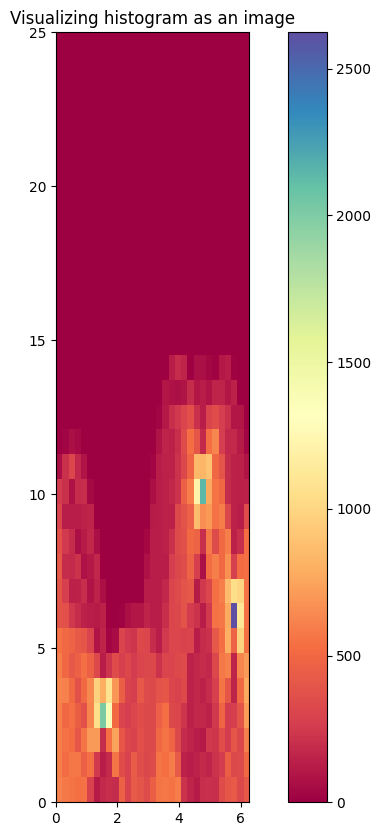

In [86]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, title='Visualizing histogram as an image')
plt.imshow(H.T, interpolation='nearest', origin='lower', extent=[edges_theta[0], edges_theta[-1], edges_rho[0], edges_rho[-1]], cmap='Spectral')
plt.colorbar();

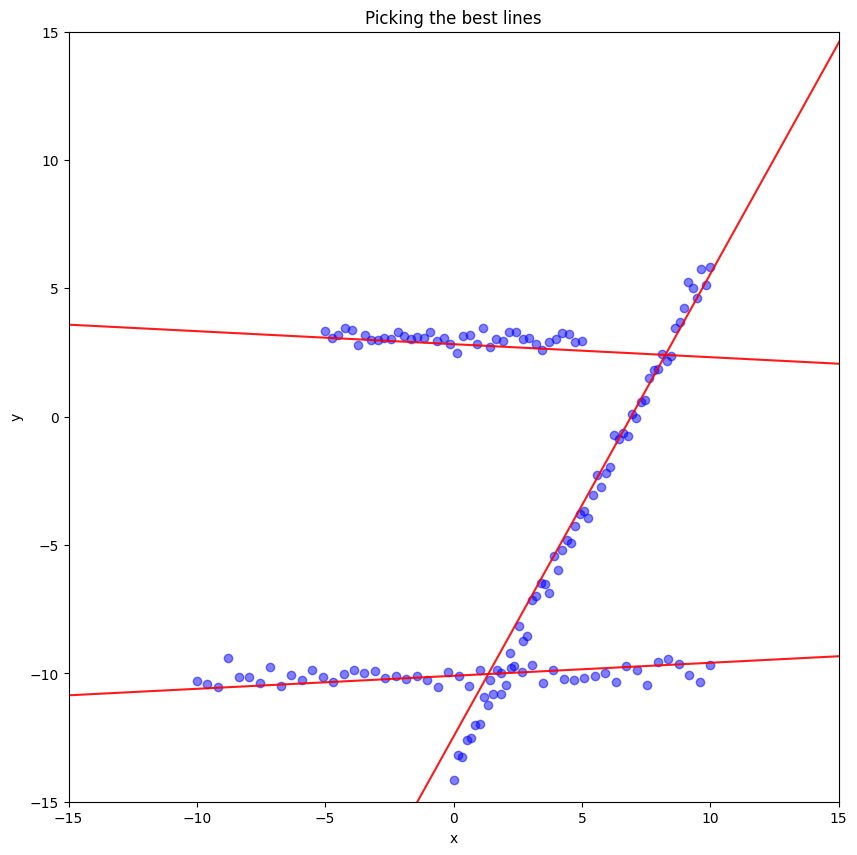

In [87]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111, aspect=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Picking the best lines')
plt.xlim(extents[:2])
plt.ylim(extents[-2:])
for i in range(k):
    coord = np.array([estimated_theta[i], estimated_rho[i]])
    draw_line_polar(coord, ax, alpha=0.9, c='red')
plt.scatter(data[:,0], data[:,1], c='blue', alpha=0.5);